In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


# Datasets
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [2]:
pd.read_csv('magic04.data')

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Here the data set's features aren't labelled, so we have to label those features as columns.

In [3]:
#Creating col as dictionary with features respective to the dataset
cols = ["flength", "fwidth", "fsize", "fconc", "fconc1", "fasym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

#Assigning the dataset with the column names
df = pd.read_csv('magic04.data', names=cols)

df.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Now since the class is either gamma or not gamma. So, we can just replace it with 1 and 0 for convinence.

In [4]:
df['class'] = (df['class'] == 'g').astype(int)
#The above replaces the class column with 0 for g and 1 for h
df.head()


,flength,fwidth,fsize,fconc,fconc1,fasym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


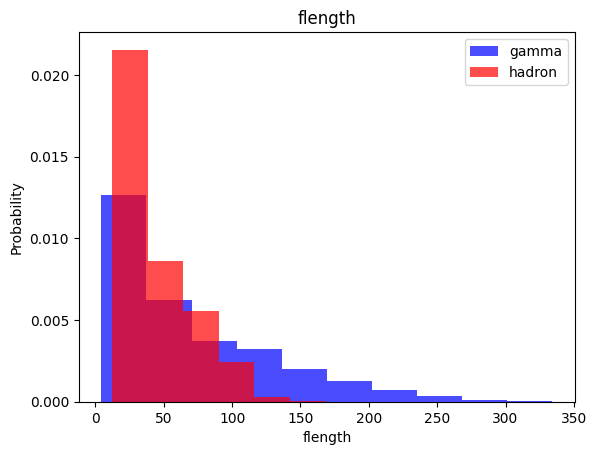

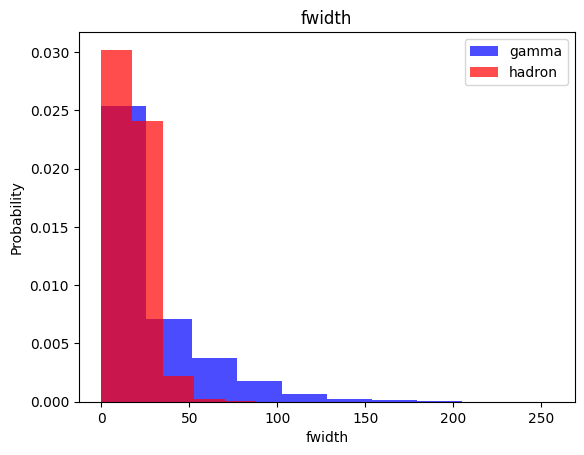

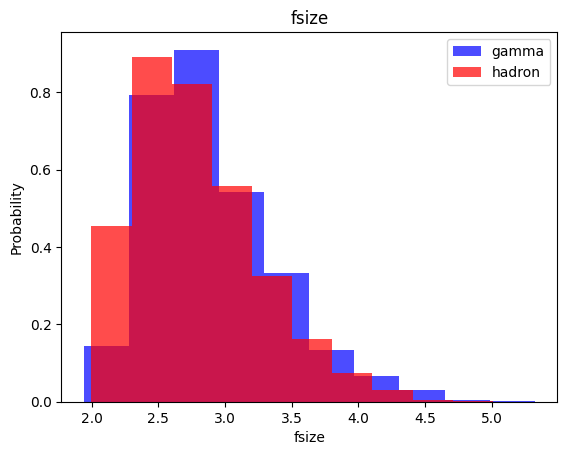

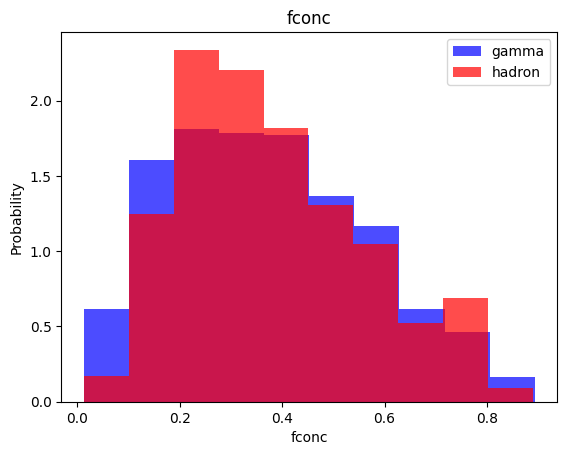

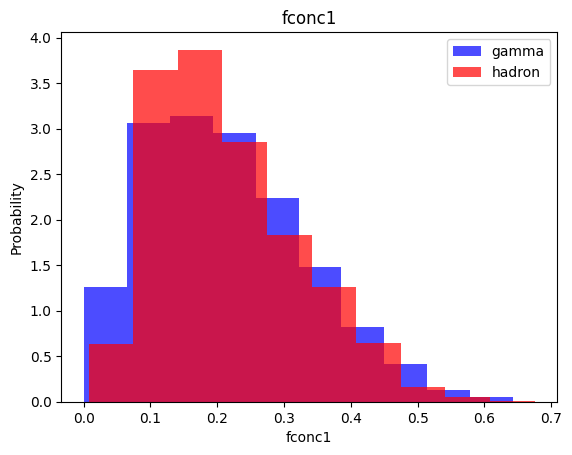

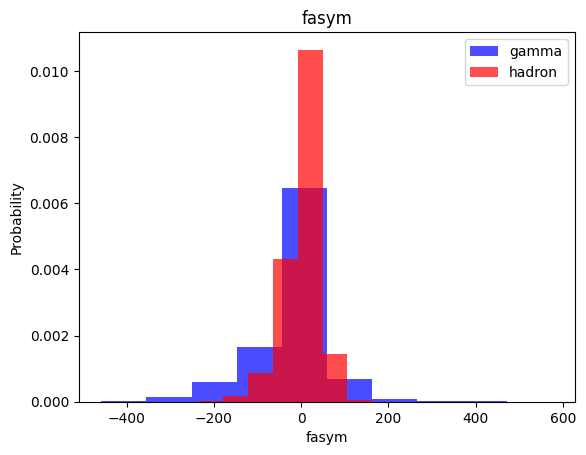

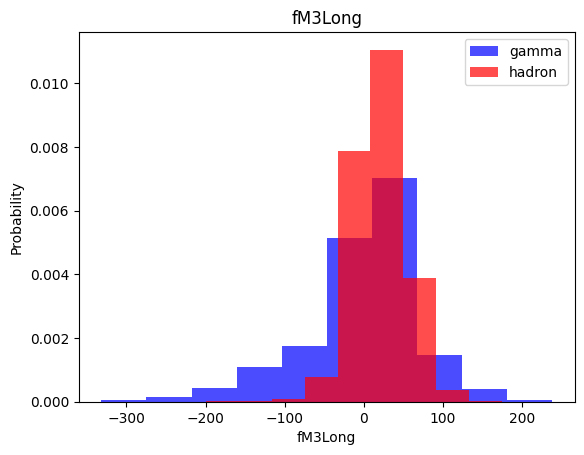

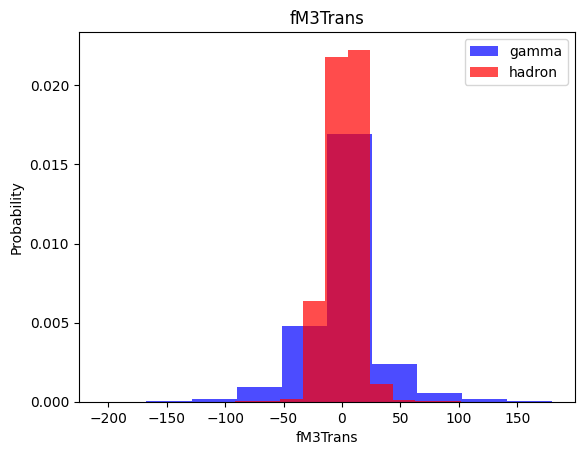

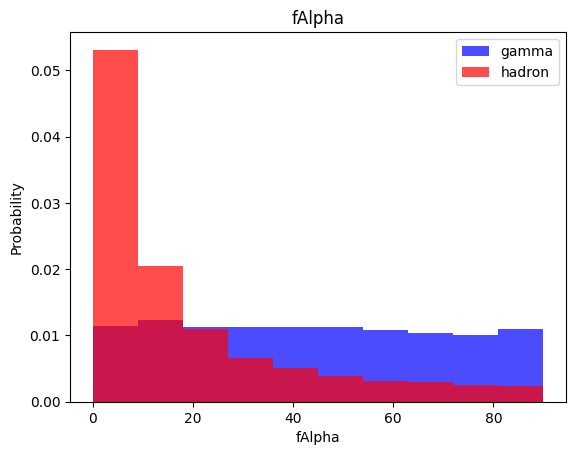

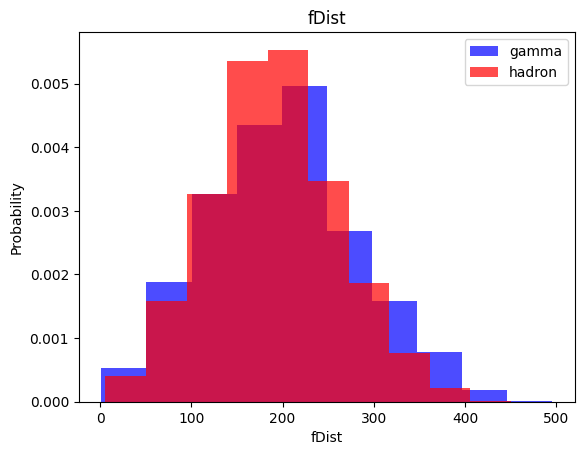

In [5]:
for label in cols[:-1]:  # excluding the last column which is the class
  # Plotting the histograms for each feature with class equals to 0 which is gamma
  plt.hist(df[df["class"]==0][label], color='blue', label='gamma', alpha=0.7, density=True) 
  # Plotting the histograms for each feature with class equals to 1 which is hadron
  plt.hist(df[df["class"]==1][label], color='red', label='hadron', alpha=0.7, density=True)
  #The density is true that is used to make the area of the histogram used to normalize the data    
  plt.title(label)
  plt.ylabel("Probability") #Becasue the density is true it shows the probability in the y axis which is normalized
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train Test and Validation Data Sets

Now, lets create 3 subsets of our data sets (Training, validation and then testing datasets). These sets of data are obtained from the df dataset.

In [17]:
train , valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(.8*len(df))])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


This line of Python code splits the dataset `df` into three subsets: **training**, **validation**, and **testing** datasets. Let's break it down in the context of supervised learning:

### **Understanding the Code**
```python
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(.8*len(df))])
```
- `df.sample(frac=1)`: This shuffles the dataset randomly to ensure that the data is well-distributed across the splits. Without shuffling, the split might be biased if the data is ordered in some way.
- `np.split(...)`: This function is used to split the dataset into parts at specific indices.
- `[int(0.6*len(df)), int(.8*len(df))]`: These indices determine the points where the dataset should be split:
  - `int(0.6*len(df))` gives the index where the first split occurs (60% of the dataset for training).
  - `int(0.8*len(df))` gives the index where the second split occurs (80% of the dataset for training + validation).

### **How the Data is Split**
- **Training Set (`train`)**: Contains the first **60%** of the shuffled dataset. This is used to train the supervised learning model.
- **Validation Set (`valid`)**: Contains the next **20%** of the dataset. This is used to tune hyperparameters and avoid overfitting.
- **Test Set (`test`)**: Contains the final **20%** of the dataset. This is used to evaluate the final model's performance on unseen data.

### **Why This Split is Important?**
In supervised learning, data is split into these three categories to ensure proper model development:
1. **Training Set**: The model learns patterns from this data.
2. **Validation Set**: Helps in tuning hyperparameters and choosing the best model configuration.
3. **Test Set**: Provides an unbiased final evaluation to measure how well the model generalizes to new data.

This method helps to prevent overfitting and ensures that the model is robust when deployed in real-world scenarios. 🚀

# Scaling the dataframe to make them relative to the mean and the standard deviation

In [18]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # The x contains data of colums except the last coloum which is class
  y = dataframe[dataframe.columns[-1]].values # The y contains data of the last coloum which is class

  scaler = StandardScaler()  # With this scaler we can fit and transform X 
  X = scaler.fit_transform(X) # Take X and then transform all those values to X 

  # If we get the length of training dataset we can see that the gamma class are more than the hadron class. This can cause irregularities. So, we overasample the hadron class to bring equality in the training dataset.
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y) # This will make the number of gamma and hadron class equal in the training dataset.

  # Create the whole data as a 2D numpy array
  ## data = np.hstack((X,y) # Hstack takes 2 array and stacks them horizontally.
  # X is a 2D array but y is a single valued value. So we need to reshape the y array as 2d.
  data = np.hstack((X, np.reshape(y, (-1, 1)))) # The reshape function of numpy will add a dimension to the array and make it 2d, here it makes the length of the array as another dimension which is one.
  
  return data, X, y

In [19]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)  

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


# Modelling

##  1) kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5) # Call the KNeighborsClassifier with n_neighbors as 5
knn_model.fit(X_train, y_train) # Pass the X and y data from the training dataset to the model

KNeighborsClassifier()

In [30]:
y_pred = knn_model.predict(X_test)   # Predict the y values for the test dataset

In [31]:
print(classification_report(y_test, y_pred)) # Print the classification report for the test dataset
# The classification report will show the precision, recall, f1-score and support for the test dataset.

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1335
           1       0.86      0.85      0.86      2469

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.81      0.81      3804



This shows 81% accuracy with precision of 74% and 86% for gamma and hadron classification.

# 2) Naive Bayes